In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import geopandas

In [6]:
pd.options.display.max_rows = 10
county = geopandas.read_file("DRP_COUNTY_BOUNDARY.shp")
lacounties = geopandas.read_file("LA_County_City_Boundaries.shp")

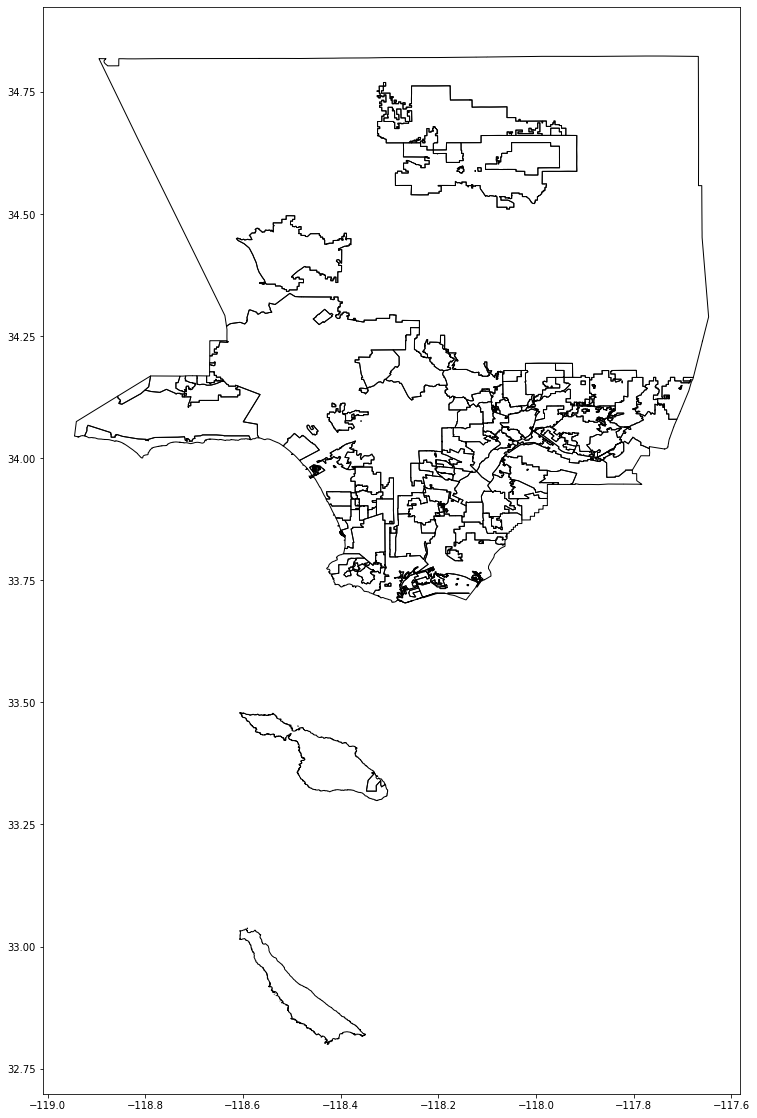

In [7]:
fig,ax= plt.subplots(figsize=(15,20))
lacounties.plot(ax=ax,edgecolor='k', facecolor='none')

In [8]:
crime =  pd.read_csv("Crime_Data_from_2010_to_Present.csv")

In [9]:
crime = crime[crime.LAT!=0]


In [10]:
crime['Coordinates']  = list(zip(crime.LON, crime.LAT))


In [11]:
crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Coordinates
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,"(-118.2695, 33.9825)"
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,"(-118.3962, 33.9599)"
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,"(-118.2524, 34.0224)"
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,"(-118.3295, 34.1016)"
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,"(-118.2488, 34.0387)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058213,191305056,01/22/2019 12:00:00 AM,01/22/2019 12:00:00 AM,1835,13,Newton,1352,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,4300 AVALON BL,NaN,34.0035,-118.2691,"(-118.2691, 34.0035)"
2058214,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490,"(-118.34899999999999, 34.0962)"
2058215,190715222,08/15/2019 12:00:00 AM,08/14/2019 12:00:00 AM,1810,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),...,Invest Cont,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732,"(-118.3732, 34.0871)"
2058216,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870,"(-118.287, 34.0637)"


In [12]:
import fiona
from shapely.geometry import Point, Polygon, LineString
from shapely.geometry import shape


In [13]:
crime['Coordinates'] = crime['Coordinates'].apply(Point)


In [14]:
crs = {'init': 'epsg:4326'}
gdf = geopandas.GeoDataFrame(crime,crs=crs, geometry='Coordinates')


In [15]:
gdf.plot(ax=ax, color="red")

<Figure size 432x288 with 0 Axes>

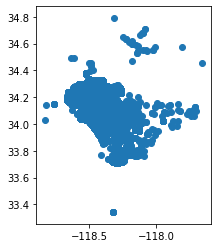

In [18]:
gdf.plot()